In [36]:
# read results
import pandas as pd
genotype_odds = pd.read_csv('/home/hermuba/data0118/ontologies/genotype_fisher_odds_corrected.csv', index_col = 0)
df = genotype_odds.replace(0,0.0001).fillna(1).applymap(math.log10)

In [2]:
# read CARD annotation, resfam
card = pd.read_csv('/home/hermuba/data0118/Escherichia0.70rm_plasmid_card.csv', index_col = 0) # loose card
resfam = pd.read_csv('/home/hermuba/data0118/resfam_anno.csv', index_col = 0)
resfam_abx = pd.read_csv('/home/hermuba/data0118/resfam_anno_abx.csv', index_col = 0)

In [15]:
def bool_categorize(df):
    x = df.stack()
    return(pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)), index = x[x!=0].index.get_level_values(0)))

In [3]:
# CARD data

# extract resistance based on antibiotic types
abx_spec = card.loc[card.index.isin(genotype_odds.index),card.columns.str.contains('determinant')]

def replace_col_name(s):
    return(s.replace('determinant of ','').replace(' resistance', '').replace('resistance to', ''))
abx_spec.rename(columns = replace_col_name, inplace = True)

# select only the class of abx included
abx_spec = abx_spec.loc[:, ['beta-lactam','fluoroquinolone','aminoglycoside']]

# make it categorical
x = abx_spec.stack()
abx_series = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)), index = x[x!=0].index.get_level_values(0))


efflux_pump = card.loc[card.index.isin(genotype_odds.index), 'efflux pump complex or subunit conferring antibiotic resistance']


# color coding
import numpy as np
lut = {np.nan: 'white',
      'beta-lactam': 'red',
      'aminoglycoside': 'cyan',
      'fluoroquinolone': 'green'}

lut2 = {False: 'white',
       True: 'grey'}


# make into one dataframe
card_annotation = pd.DataFrame(index = genotype_odds.index)
card_annotation.loc[efflux_pump.index, 'efflux pump'] = efflux_pump.map(lut2)
card_annotation.loc[abx_series.index, 'antibiotic'] = abx_series.map(lut)

# fillna with white
card_annotation.fillna('white', inplace = True)

In [33]:
import matplotlib.cm as cm

def make_lut(series):
    labels = series.unique()
    lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
    return(lut)

In [89]:
len(r2_color.index.unique())

391

In [34]:
# select only the data wanted
r = bool_categorize(resfam.loc[resfam.index.isin(genotype_odds.index)])
lut3 = make_lut(r)
r_color = r.map(lut3)

In [74]:
# select only the data wanted
r2 = bool_categorize(resfam_abx.loc[resfam_abx.index.isin(genotype_odds.index)])
lut4 = make_lut(r2)
r2_color = r2.map(lut4)

In [5]:
resfam_abx_colormap = resfam_abx.applymap(lambda x: lut2[x] if x != np.nan else 'white').loc[genotype_odds.index]

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [6]:
resfam_abx.columns

Index(['rRNA Methyltransferase', 'Aminoglycoside Modifying Enzyme',
       'ABC Transporter', 'RND Antibiotic Efflux', 'Other Efflux',
       'Gene Modulating Resistance', 'Beta-Lactamase',
       'Chloramphenicol Resistance', 'MFS Transporter', 'Quinolone Resistance',
       'Other', 'Tetracycline MFS Efflux', 'Tetracycline Ribosomal Protection',
       'Tetracycline Inactivation', 'Gylcopeptide Resistance',
       'Aminoglycoside Resistance'],
      dtype='object')

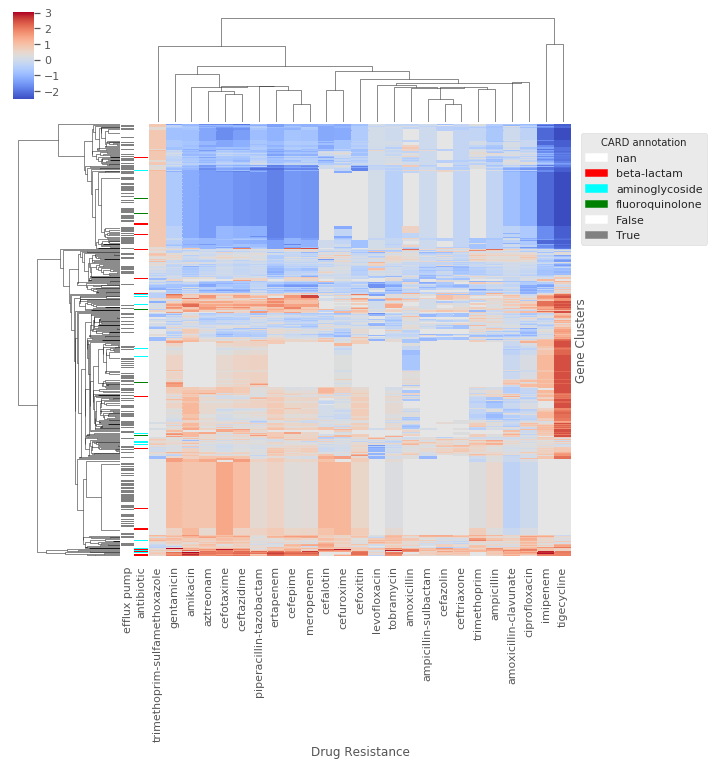

In [12]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline
import matplotlib.patches as mpatches


g = sns.clustermap(df, row_colors=card_annotation, cmap = 'coolwarm', yticklabels = False, mask = genotype_odds.isnull(), method = 'centroid')

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")

legend_card = [mpatches.Patch(color=lut[c],label=c) for c in lut.keys()]
legend_efflux = [mpatches.Patch(color=lut2[c],label=c) for c in lut2.keys()]
legend_TN = legend_card + legend_efflux
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='CARD annotation',prop={'size':10})


/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/seaborn/matrix.py:823: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  colors = colors.loc[data.index]


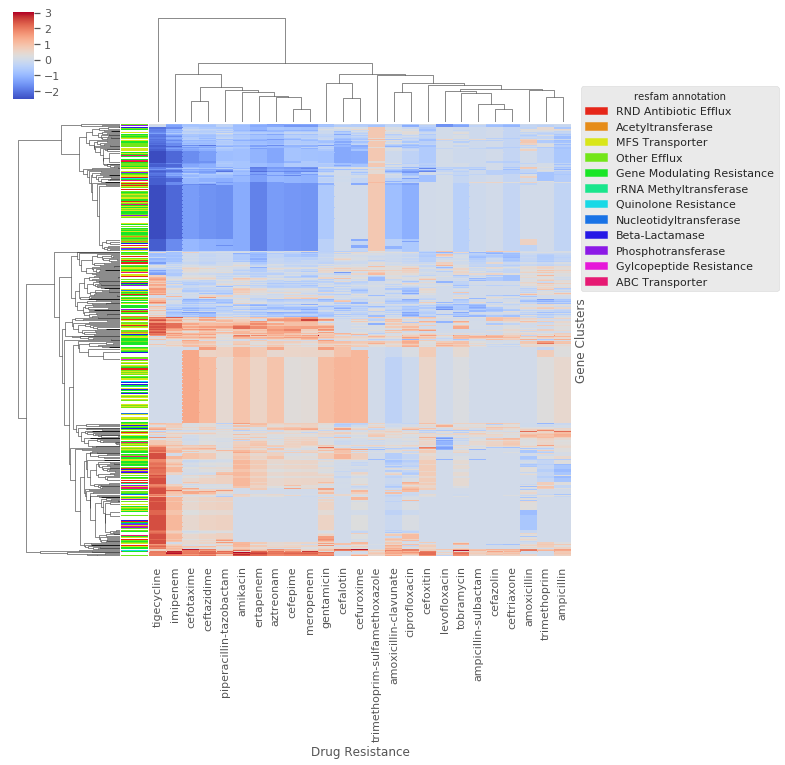

In [37]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline


g = sns.clustermap(df,row_colors=r_color, cmap = 'coolwarm', yticklabels = False)

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")


# add legent
legend_TN = [mpatches.Patch(color=lut3[c],label=c) for c in lut3.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='resfam annotation',prop={'size':10})

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/seaborn/matrix.py:823: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  colors = colors.loc[data.index]


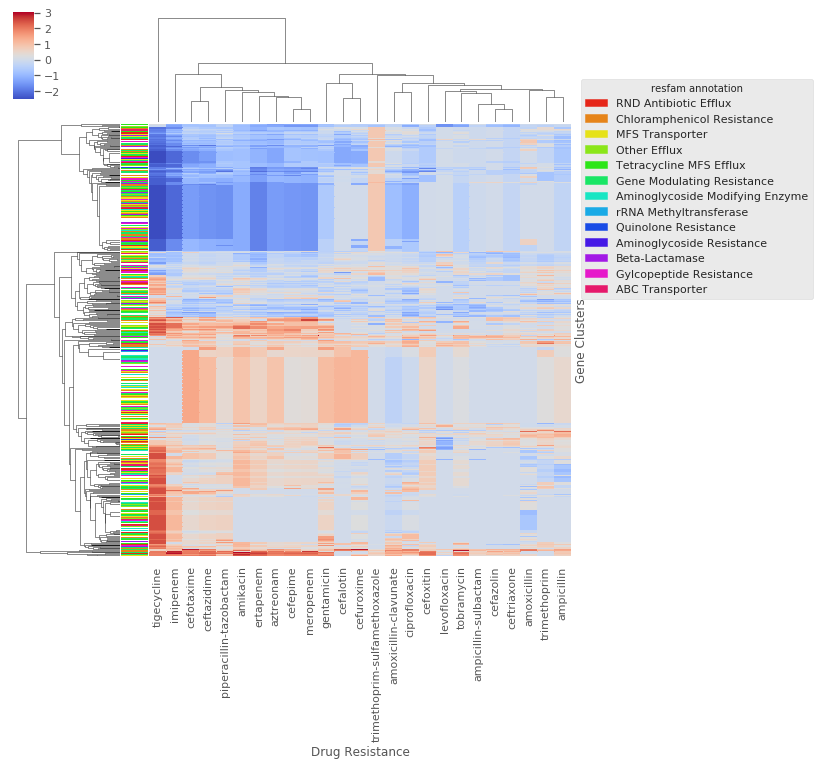

In [39]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline


g = sns.clustermap(df,row_colors=r2_color, cmap = 'coolwarm', yticklabels = False)

# ADDED: Remove labels.
ax = g.ax_heatmap
ax.set_xlabel("Drug Resistance")
ax.set_ylabel("Gene Clusters")

legend_TN = [mpatches.Patch(color=lut4[c],label=c) for c in lut4.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='resfam annotation',prop={'size':10})

In [40]:
# return phenotype hierachial clustering
Z = g.dendrogram_row.linkage

# pick cluster
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:] # avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

array([[ 2.19810862,  1.18110574,  4.        ,  1.34061847],
       [ 2.72965234,  0.74720512, 14.        ,  1.57158205],
       [ 3.14374323,  0.43846615, 12.        ,  1.92715328],
       [ 3.2276667 ,  0.52979537, 18.        ,  1.63290655],
       [ 2.13221241,  0.90195612, 15.        ,  2.29811728],
       [ 3.25744954,  0.5062718 , 23.        ,  2.10300367],
       [ 3.57665049,  0.54918093, 14.        ,  2.0290253 ],
       [ 2.76305047,  1.55776647,  7.        ,  1.86479172],
       [ 3.5466983 ,  1.45434865, 16.        ,  2.16968163],
       [ 3.27303347,  1.71286579, 22.        ,  2.30547646]])

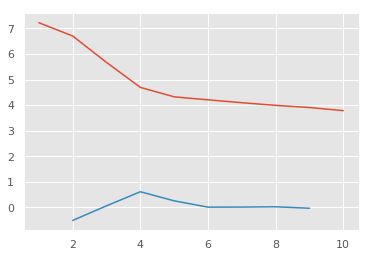

clusters: 4


In [41]:
# choose optimal depth
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [52]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(Z, 12, criterion='maxclust') # but 9 doesn't show the one I am interested in
cluster = pd.Series(cluster, index = genotype_odds.index)

lut5 = make_lut(cluster)
cluster_color = cluster.map(lut5)

In [100]:
cluster.to_csv('/home/hermuba/data0118/ontologies/phenotype_cluster_25drug.csv')

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


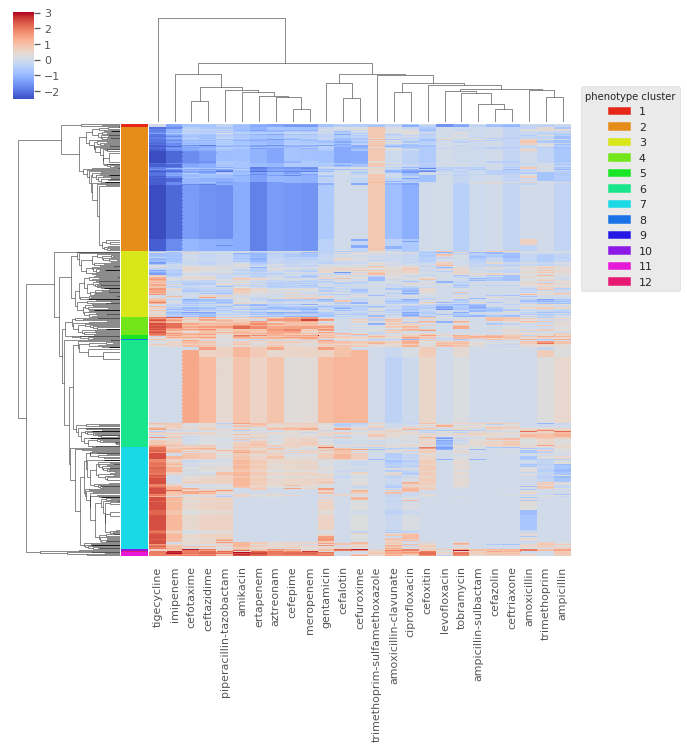

In [53]:
g = sns.clustermap(df, cmap = 'coolwarm', row_colors=cluster_color, yticklabels = False)

# set legend

import matplotlib.patches as mpatches
legend_TN = [mpatches.Patch(color=lut5[c],label=c) for c in lut5.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='phenotype cluster',prop={'size':10})

In [55]:
drug_df = pd.read_pickle('/home/hermuba/data0118/drug_category')

In [81]:
drug_df.loc[drug_df['drug']== 'tigecycline'] # wrong

,category,drug,order
88,b_lactam_inhibitor,tigecycline,1.0


In [92]:
drug_df.loc[drug_df['drug']== 'amoxicillin']

,category,drug,order
80,aminoglycosides,amoxicillin,8.0


In [95]:
#drug_df.iloc[88]= ['b_lactam_inhibitor', 'amoxicillin', 1.0]

In [96]:
#drug_df.iloc[80]= ['aminoglycosides', 'tigecycline', 8.0]

In [99]:
#drug_df.to_pickle('/home/hermuba/data0118/drug_category')

In [59]:
drug_order = drug_df.loc[drug_df['drug'].isin(genotype_odds.columns)].sort_values(by = 'order')['drug']

In [78]:
df.loc[r2.sort_values().index, drug_order].columns


Index(['ampicillin', 'tigecycline', 'piperacillin-tazobactam', 'ceftazidime',
       'cefoxitin', 'ceftriaxone', 'cefotaxime', 'cefepime', 'cefazolin',
       'cefuroxime', 'aztreonam', 'meropenem', 'imipenem', 'ertapenem',
       'amoxicillin', 'tobramycin', 'gentamicin', 'amikacin', 'levofloxacin',
       'ciprofloxacin', 'trimethoprim'],
      dtype='object')

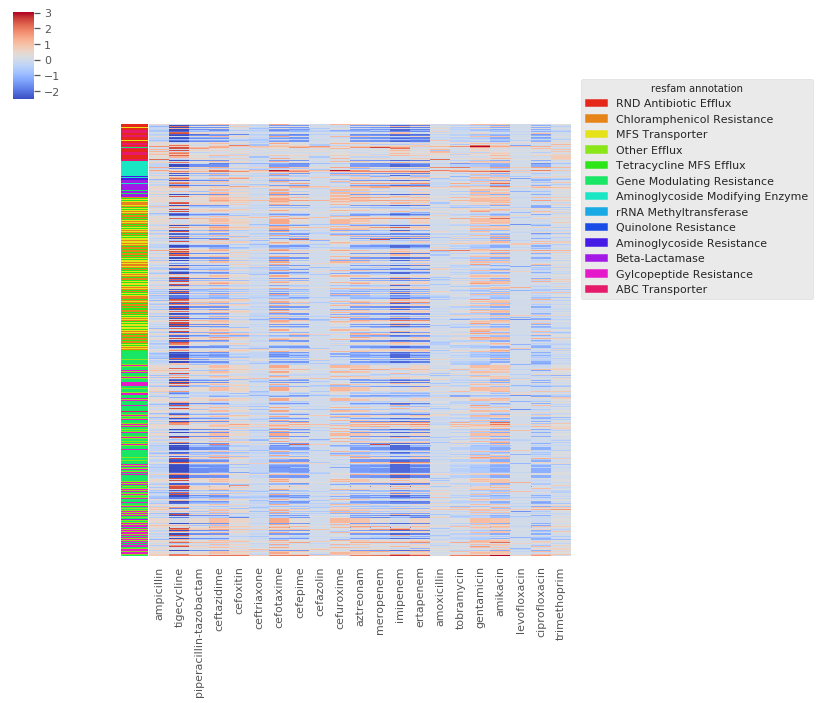

In [91]:
g = sns.clustermap(df.loc[r2.sort_values().index, drug_order], row_cluster = False, col_cluster = False, row_colors=r2_color, cmap = 'coolwarm', yticklabels = False)
legend_TN = [mpatches.Patch(color=lut4[c],label=c) for c in lut4.keys()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='resfam annotation',prop={'size':10}) # some have 2 classes